In [1]:
# Our inital imports to make the font size appropriate and make jupyter notebook as wide as the webpage

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
display(HTML("<style>.container { font-size:16px !important; }</style>"))

In [2]:
# Import appropriate packages and set up nice plotting:

import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib
font = {'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)
matplotlib.rc('text', usetex=False)

# Temporal coherence 

We are going to sketch some waves and then superpose them and numerically calculate the irradiance. Let's try ;) 

This is the sketch of the problem:

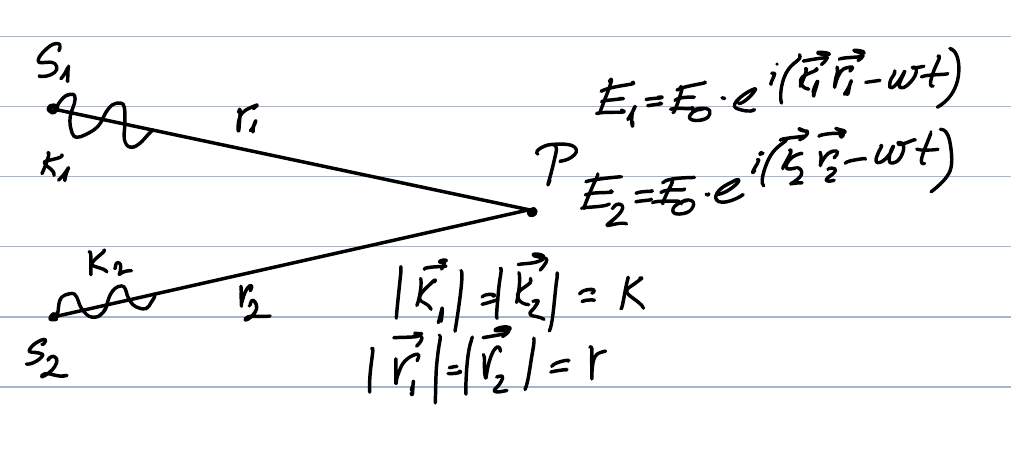

#### To summarize the situation: 

- Two waves are propagating along two directions, they meet at point P. I know I said multiple times that waves exist everywhere in space but this can be something like a wave packet. So it is limited in space (and, as we will see later, in time). 
- Distances the waves are traversing are the same. 
- We will use the same spatial and temporal grid for both waves. 
- We will add electric fields in the end, square them, and average over time to get the measure irradiance. 

Let's go! 

In [3]:
# These are our space and time grids. Spanning from 0 to 100 "units", in 1001 points in total (so step is 0.1)

r = np.linspace(0,100,1001)
t = np.linspace(0,100,2001)

# Wavelength and period in the above given units (don't worry about units so much)
llambda = 1.0
T = 1.0
k = 2.*np.pi / llambda
omega = 2.*np.pi / T

In [4]:
# Let's sketch the harmonic wave in r, t (2D plot)
E = np.cos(k*r[:,None] - omega*t[None,:])

# A moment do discuss this notation. Using "None" extends the shape of the array to the other variables in the expression.
# For example r[:,None] says: first dimension of r stays at it was, add second one and adjust it to the other variables. While t[None,:],
# does the opposite. Overall, the result will be a 2D array with dimensions equal to lenght(r) x length(t)

Text(0, 0.5, 'time')

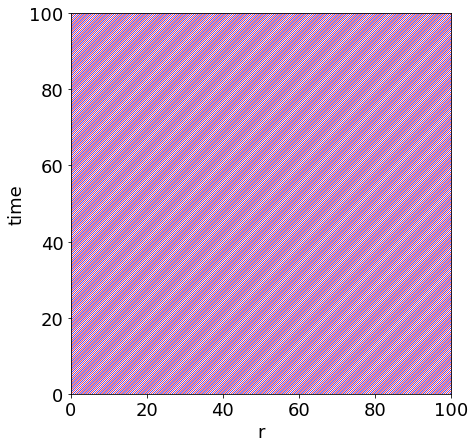

In [5]:
# Let's plot it as a 2D plot:
plt.figure(figsize=[10,7])
plt.imshow(E.T,origin='lower',extent = [r[0],r[-1],t[0],t[-1]],cmap='bwr')
plt.xlabel("r")
plt.ylabel("time")

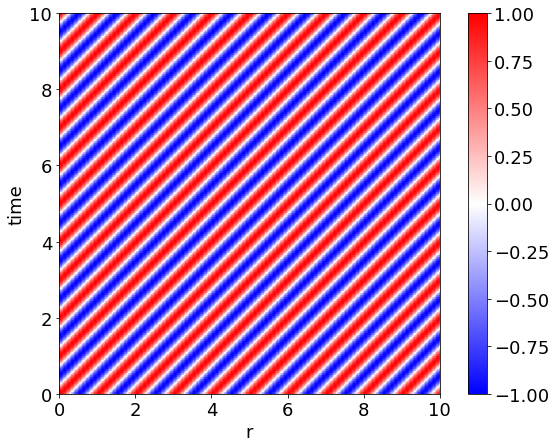

In [6]:
# We can't really see waves there, let's plot a smaller range:
# Let's plot it as a 2D plot:
plt.figure(figsize=[10,7])
plt.imshow(E.T,origin='lower',extent = [r[0],r[-1],t[0],t[-1]],cmap='bwr')
plt.xlabel("r")
plt.ylabel("time")
plt.xlim([0,10])
plt.ylim([0,10])
plt.colorbar()

### What do we see here? 

#### Well, look at t=0, we see maxima and minima in red and blue. Then, as you move up (forward in time), the maxima and minima are moving to the right. Makes sense! 

#### Now, let's make a wavepacket. That is a wave that looks like a harmonic one but has limited time duration. This is nothing new! We played with it during the last class and discussed how it will yield incoherent superposition.

In [7]:
# Define the function that calculates the wave: 

def pseudo_harmonic_wave(r,t,omega,k, phi_0):
    E = np.cos(k*r[:,None] - omega*t[None,:] + phi_0) # calculate it everywhere for start:
    v = omega / k # speed of the wave
    # ahead of the wave:
    ahead = np.where((r[:,None] - v*t[None,:]) > 10.)
    E[ahead] = 0.0
    # behind 
    behind = np.where(r[:,None]-v*t[None,:] < 0)
    E[behind] = 0.0
    return E

Text(0, 0.5, 'time')

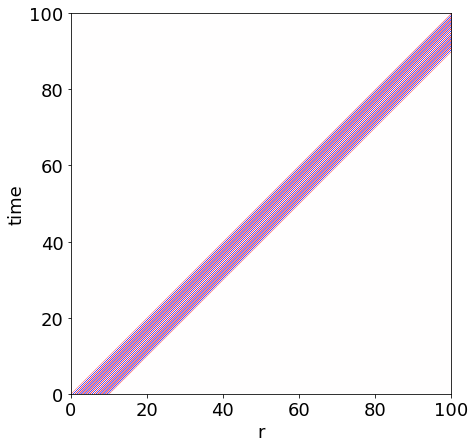

In [8]:
E = pseudo_harmonic_wave(r,t,omega,k,0)
plt.figure(figsize=[10,7])
plt.imshow(E.T,origin='lower',extent = [r[0],r[-1],t[0],t[-1]],cmap='bwr')
plt.xlabel("r")
plt.ylabel("time")

#### Does this make sense? What about all the places where E = 0 ? 

#### Plot this in 1D, is it really a traveling perturbance? 

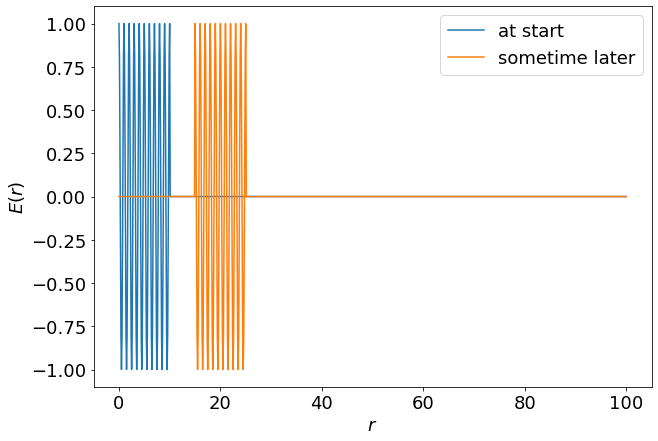

In [9]:
# Let's make sure it looks good when plotted in 1D.
# I will plot wave as E(r) in two instances of time:

plt.figure(figsize=[10,7])
plt.plot(r,E[:,0],label='at start')
plt.plot(r,E[:,300],label= 'sometime later')
plt.xlabel("$r$")
plt.ylabel("$E(r)$")
plt.legend()


#### Neat! So far it looks good! This is a package that travels to the right. 

#### Let's calculate the irradiance of this wave. How do we do that? Well we temporaly average E^2 in one point. This point is the one where we do the measurement (say, r = rmax). 

#### Later, this will be the point where the two "beams" meet. 

#### But for now, let's just plot E(t) in that given point of space.


Text(0.5, 1.0, 'Electric field variation with time in the endpoint')

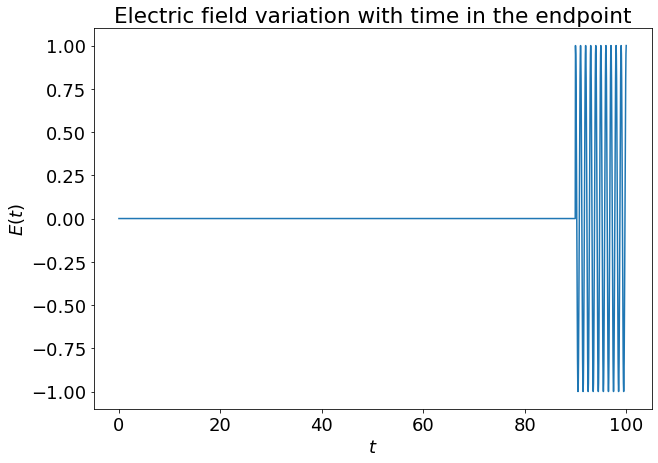

In [10]:
plt.figure(figsize=[10,7])
plt.plot(t,E[-1,:])
plt.xlabel("$t$")
plt.ylabel("$E(t)$")
plt.title("Electric field variation with time in the endpoint")

#### Does this make sense? Discuss. 
#### Let's now square and average.

Text(0.5, 1.0, 'Square of the electric field in the endpoint')

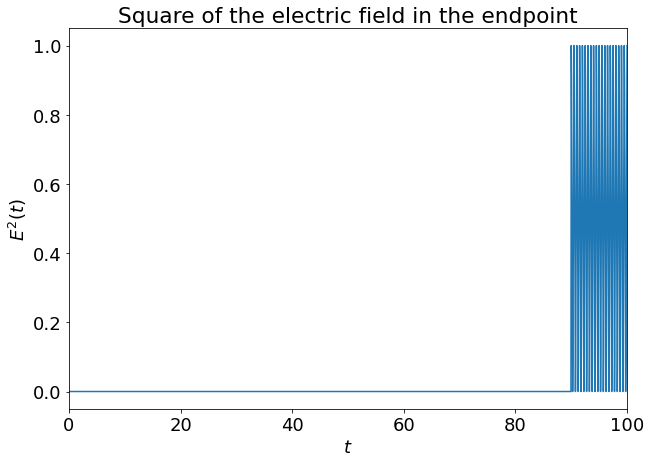

In [14]:
plt.figure(figsize=[10,7])
plt.plot(t,E[-1,:]**2.0)
plt.xlim([0,100])
plt.xlabel("$t$")
plt.ylabel("$E^2(t)$")
plt.title("Square of the electric field in the endpoint")

## Question for you: What is time averaged square of the electric field here? (2-3 mins)

In [15]:
E_sq = E[-1,:]**2. # index -1 is the last point
t_step = t[1] - t[0] # This is integration step 
t_total = t[-1] - t[0] # This is the total time to divide with

I = np.sum(E_sq) * t_step / t_total
print ("Irradiance is = ", I)

Irradiance is =  0.05049999999999987


#### This irradiance makes sense. The wave creates the perturbance in the last point only for the 1/10 of the time. Plus there is 1/2 factor for the averaging so irradiance amounts to ~ 0.05. It is not exactly 0.05 because we are calculating stuff numerically.

#### Now, let's do the superposition between the two waves. That are exactly the same:
- Both are wavepackets with the same duration
- Both traverse the path of the same lenght (not necesarilly the exact same path). 
- Both have the same wavelength and frequency
- We will add them in the last point, square, and average over time, which means - measure irradiance!

In [16]:
# completely the same
E1 = pseudo_harmonic_wave(r,t,omega,k,0)
E2 = pseudo_harmonic_wave(r,t,omega,k,0)
E_sq = (E1[-1,:] + E2[-1,:])**2.0



Text(0.5, 1.0, 'Square of the total electric field in the endpoint')

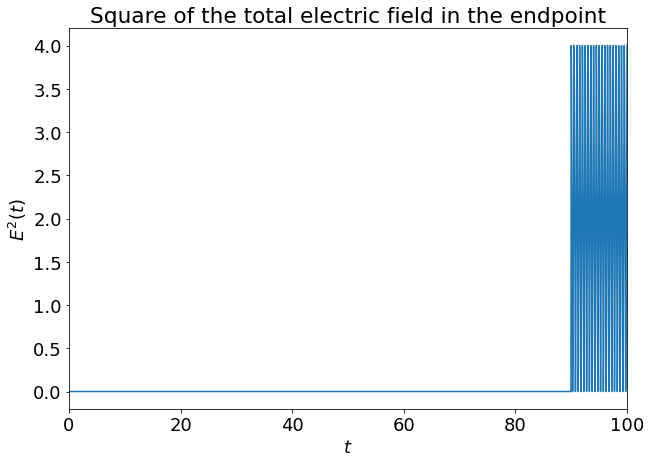

In [18]:
plt.figure(figsize=[10,7])
plt.plot(t,E_sq[:])
plt.xlim([0,100])
plt.xlabel("$t$")
plt.ylabel("$E^2(t)$")
plt.title("Square of the total electric field in the endpoint")

In [19]:

I_super = np.sum(E_sq) * t_step / t_total
print ("Irradiance for superposition of two waves is = ", I_super)
print ("Irradiance increases by a factor of: ", I_super/I)

Irradiance for superposition of two waves is =  0.20199999999999949
Irradiance increases by a factor of:  4.0


### Makes sense! Irradiance increases by a factor of 4! 

### Now let's add them with a phase difference. Say, $\pi$?

In [20]:
E1 = pseudo_harmonic_wave(r,t,omega,k,0)
E2 = pseudo_harmonic_wave(r,t,omega,k,np.pi)
E_sq = (E1[-1,:] + E2[-1,:])**2.0
I_super = np.sum(E_sq) * t_step / t_total
print ("Irradiance for superposition of two waves is = ", I_super)

Irradiance for superposition of two waves is =  3.24218923719787e-31


### So, basically zero!

### What can you conclude about the interference of these two waves? (Wavepackets)

#### Wavepackets also can constructively and destructively interfere

#### They behave exactly like harmonic plane waves if r1 = r2 

#### And if not... we are going to see now.


### Now we can do the same but for three packets!

In [21]:
# These are three wave packets :-)
# Three wave packets for each "beam", to be precise. 

E1 = pseudo_harmonic_wave(r,t,omega,k,0) + pseudo_harmonic_wave(r,t-13,omega,k,0) + pseudo_harmonic_wave(r,t-26,omega,k,0)
E2 = pseudo_harmonic_wave(r,t,omega,k,0) + pseudo_harmonic_wave(r,t-13,omega,k,0) + pseudo_harmonic_wave(r,t-26,omega,k,0)

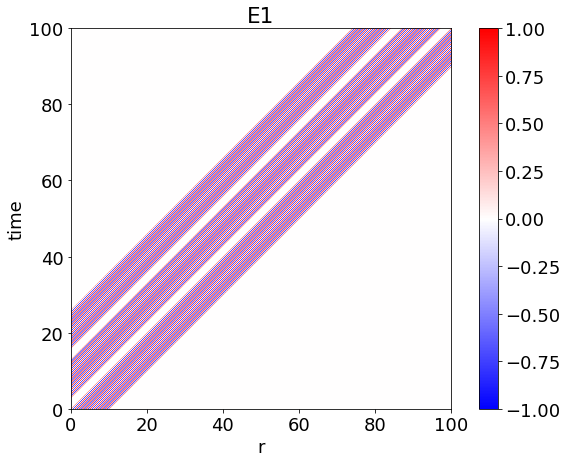

In [22]:
plt.figure(figsize=[10,7])
plt.imshow(E1.T,origin='lower',extent = [r[0],r[-1],t[0],t[-1]],cmap='bwr')
plt.xlabel("r")
plt.ylabel("time")
plt.title("E1")
plt.colorbar()

Text(0, 0.5, 'Electric field E1')

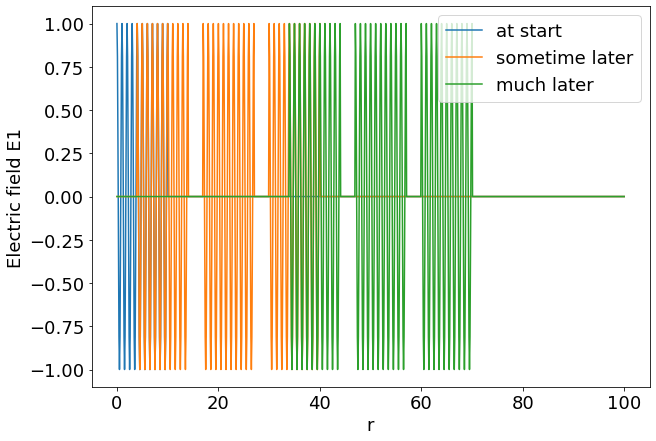

In [23]:
# Let's make sure it looks good when plotted:

plt.figure(figsize=[10,7])
plt.plot(r,E1[:,0],label='at start')
plt.plot(r,E1[:,600],label= 'sometime later')
plt.plot(r,E1[:,1200],label= 'much later')

plt.legend()
plt.xlabel("r")
plt.ylabel("Electric field E1")

Makes sense, but we need to extend the time so all the packets can make it to the end of $r$ grid.

In [24]:
r = np.linspace(0,100,1001)
t = np.linspace(0,200,4001) # Now more points for t and larger extent
llambda = 1.0
T = 1.0
k = 2.*np.pi / llambda
omega = 2.*np.pi / T

Text(0.5, 1.0, 'E1')

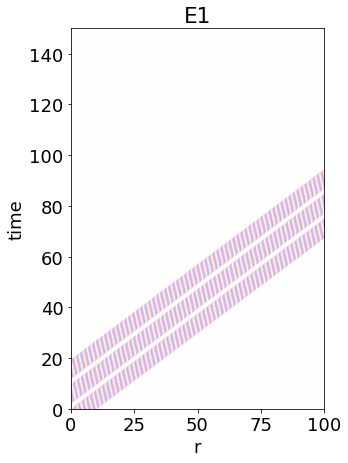

In [25]:
E1 = pseudo_harmonic_wave(r,t,omega,k,0) + pseudo_harmonic_wave(r,t-13,omega,k,0) + pseudo_harmonic_wave(r,t-26,omega,k,0)
E2 = pseudo_harmonic_wave(r,t,omega,k,0) + pseudo_harmonic_wave(r,t-13,omega,k,0) + pseudo_harmonic_wave(r,t-26,omega,k,0)
plt.figure(figsize=[10,7])
plt.imshow(E1.T,origin='lower',extent = [r[0],r[-1],0,150],cmap='bwr')
plt.xlabel("r")
plt.ylabel("time")
plt.title("E1")

### Looks good, most of the time grid is empty, but we do not care about that! We are just looking at the relative changes between one and two waves, not actual values! 

### Now let's average in time again:

In [26]:
t_step = t[1] - t[0]
t_total = t[-1] - t[0]

I_single = np.sum(E1[-1,:]**2.0)*t_step/t_total
I_super = np.sum((E1[-1,:]+E2[-1,:])**2.0)*t_step/t_total
print ("Irradiance for one wave = ", I_single)
print ("Irradiance for superposition of two waves is = ", I_super)
print ("Irradiance increases by a factor of: ", I_super/I_single)

Irradiance for one wave =  0.0757499999999998
Irradiance for superposition of two waves is =  0.3029999999999992
Irradiance increases by a factor of:  4.0


### No matter over how large time interval I do this. No matter how many packages are there. These are always going to interfere, and constructively. These two waves are perfectly coherent! 

### But what happens when they do not traverse the same distance?

### When one of them systematically travels longer or shorter distance? 

. 
.
.
.
.

### Any guessses? We can write here (above).

### Go back to the example of two wavepackets and introduce a path difference between them.


In [46]:
E1 = pseudo_harmonic_wave(r,t,omega,k,0)
E2 = pseudo_harmonic_wave(r+5,t,omega,k,0) # we shifted by two wavelengths, right?

### Plot the time variation of both the fields in the last point, and then their sum:

Text(0, 0.5, '$E_1(t)+E_2(t)$')

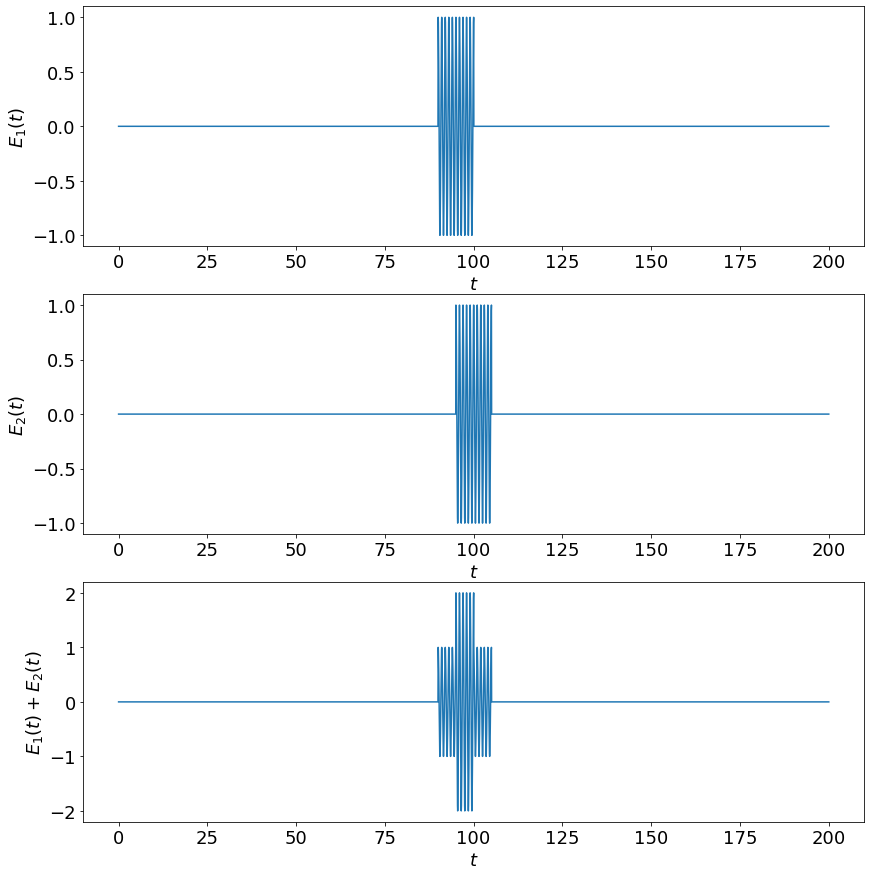

In [47]:
plt.figure(figsize=[14,15])
plt.subplot(311)
plt.plot(t,E1[-1,:])
plt.xlabel("$t$")
plt.ylabel("$E_1(t)$")
plt.subplot(312)
plt.plot(t,E2[-1,:])
plt.xlabel("$t$")
plt.ylabel("$E_2(t)$")
plt.subplot(313)
plt.plot(t,E1[-1,:]+E2[-1,:])
plt.xlabel("$t$")
plt.ylabel("$E_1(t)+E_2(t)$")

Text(0, 0.5, '$E_1(t)+E_2(t)$')

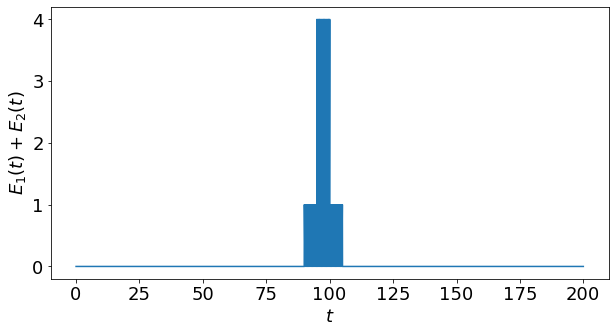

In [48]:
plt.figure(figsize=[10,5])
plt.plot(t,(E1[-1,:]+E2[-1,:])**2.0)
plt.xlabel("$t$")
plt.ylabel("$E_1(t)+E_2(t)$")

In [49]:
# Let's calculate each irradiance separately and then their joint irradiance:
t_step = t[1]-t[0]
t_total = t[-1]-t[0]
I1 = np.sum(E1[-1,:]**2.0)*t_step / t_total
I2 = np.sum(E2[-1,:]**2.0)*t_step / t_total
I_total = np.sum((E1[-1,:]+E2[-1,:])**2.0)*t_step / t_total

print("Irradiance of the first wave alone is:", I1)
print("Irradiance of the first wave alone is:", I2)
print("Irradiance of the first wave alone is:", I_total)
print("Irradiance increased by a factor of:", I_total/I1)

Irradiance of the first wave alone is: 0.025249999999999932
Irradiance of the first wave alone is: 0.025249999999999963
Irradiance of the first wave alone is: 0.07599999999999982
Irradiance increased by a factor of: 3.009900990099011


### Why is this so? Why did they not amplify by a factor of 4? They were in phase after all! 

### What do you think? 

### What would happen if I increased the r "offset" by some amount?

### Let's do all the same but the difference now is r = 2.5

### In case of ideal monochromatic plane waves, we would expect exact cancelation!

In [25]:
# Let's calculate each irradiance separately and then their joint irradiance:
E1 = pseudo_harmonic_wave(r,t,omega,k,0)
E2 = pseudo_harmonic_wave(r+2.5,t,omega,k,0) # we shifted by two wavelengths, right?
t_step = t[1]-t[0]
t_total = t[-1]-t[0]
I1 = np.sum(E1[-1,:]**2.0)*t_step / t_total
I2 = np.sum(E2[-1,:]**2.0)*t_step / t_total
I_total = np.sum((E1[-1,:]+E2[-1,:])**2.0)*t_step / t_total

print("Irradiance of the first wave alone is:", I1)
print("Irradiance of the first wave alone is:", I2)
print("Irradiance of the first wave alone is:", I_total)

Irradiance of the first wave alone is: 0.025249999999999932
Irradiance of the first wave alone is: 0.02525000000000004
Irradiance of the first wave alone is: 0.012499999999999687


### Now they did not cancel completely! 

## Write your conclusions here:

. 

.

.

.

.

.

# Another way to model this (i.e. how to show different sources cannot be coherent).

### Two sources can emit similar packets, but they will never have the same phases. Let's now imagine what happens when we have a bunch of packets and they try to superimpose with different phases.

In [59]:
N_packets = 20

random_phase = np.random.uniform(-np.pi,np.pi,N_packets)
print (random_phase)

[ 1.16058956 -0.1484023   1.08683566  2.00670778 -2.51251184 -1.30764393
  0.99104242 -2.24694727  2.78777516 -2.28771075  1.14250228 -0.89816655
 -0.90310709 -3.06785007  0.6109741   2.73348447  0.11602286  1.64191959
  2.56666001  2.95672656]


In [60]:
E1 = pseudo_harmonic_wave(r,t,omega,k,0)
E2 = pseudo_harmonic_wave(r,t,omega,k,random_phase[0])
for i in range(1,20):
    E1 += pseudo_harmonic_wave(r,t-i*13,omega,k,0)
    E2 += pseudo_harmonic_wave(r,t-i*13,omega,k,random_phase[i])

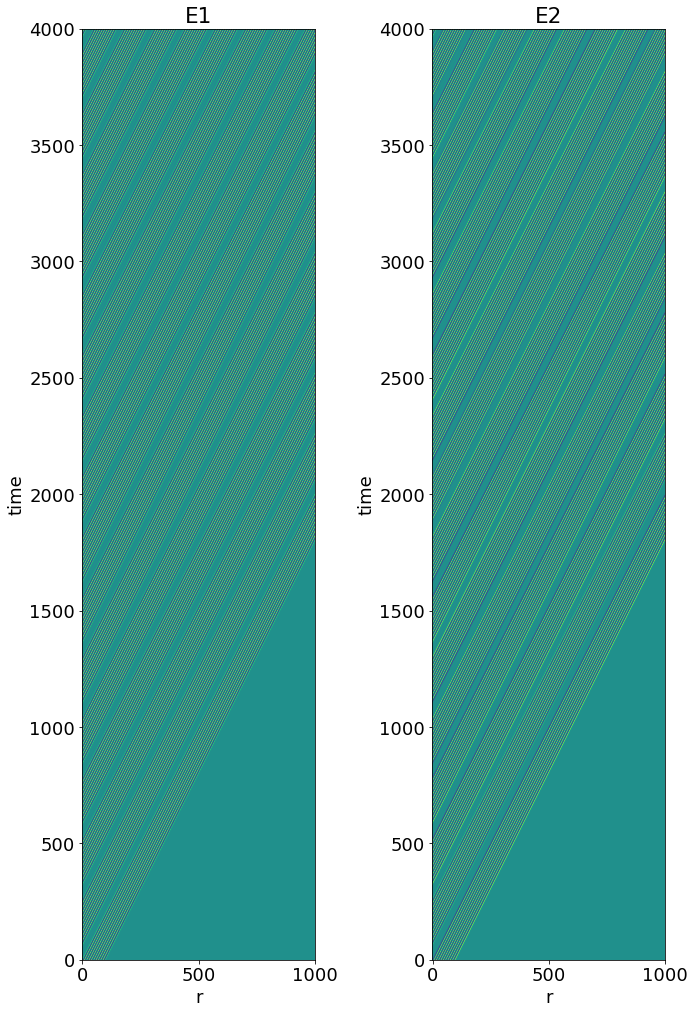

In [61]:
plt.figure(figsize=[10,20])
plt.subplot(121)
plt.imshow(E1.T,origin='lower')
plt.xlabel("r")
plt.ylabel("time")
plt.title("E1")
plt.subplot(122)
plt.imshow(E2.T,origin='lower')
plt.xlabel("r")
plt.ylabel("time")
plt.title("E2")
plt.tight_layout()

#plt.colorbar()

#### This is now a lot of (20) packages, traveling to the right, but they have slightly different phases. 

#### What happens with the superposition now?

In [62]:
I_single = np.sum(E1[-1,:]**2.0)*t_step/t_total
I_super = np.sum((E1[-1,:]+E2[-1,:])**2.0)*t_step/t_total
print ("Irradiance for one wave = ", I_single)
print ("Irradiance for superposition of two waves is = ", I_super)
print ("Irradiance increases by a factor of: ", I_super/I_single)

Irradiance for one wave =  0.2172499999999996
Irradiance for superposition of two waves is =  0.44521970467398037
Irradiance increases by a factor of:  2.0493427142645855


We see that the superposition has irradiance which is smaller than 4 x the original one! So we do not have constructive interference

Interference now looks something like:

$$I = I_1 + I_2 + 2\sqrt{I_1 I_2} \cos\delta (t) $$

where $\delta(t) = \phi_0(t)$, is random in time and hence these terms cancel for the most part. Actually if we increased the $t$ grid further and had much more packages, we should see it average exactly to 2. 

To visualize it better, here is the time evolution of the electric field in the last grid point, where we are adding the two electric fields:

Text(0, 0.5, 'Superposition of the fields in point P')

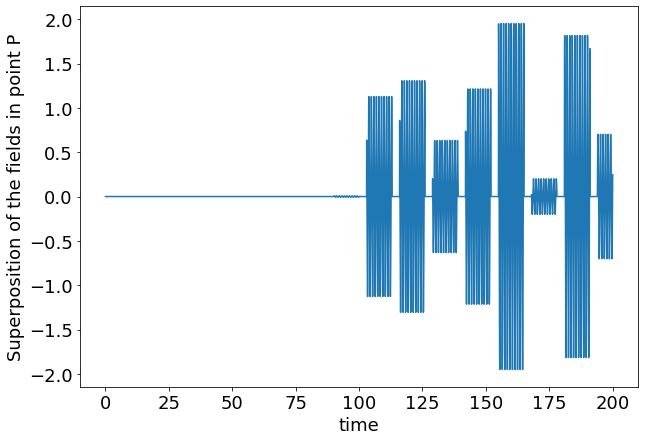

In [57]:
E_P = E1[-1,:] + E2[-1,:]
plt.figure(figsize=[10,7])
plt.plot(t,E_P)
plt.xlabel("time")
plt.ylabel("Superposition of the fields in point P")
#plt.xlim([90,100])

#### In the first part the electric field is zero as yet none of the packages made it to the last point. In the latter part there are constructive and destructive (and intermediate, or partial) interferences happening, as the phase difference between the two is random.

# That's all folks! Play with this any way you see fit, and enjoy!